<a href="https://colab.research.google.com/github/ricardoruiz19/TalentoTech/blob/main/Practica_SQL_NoSQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas sqlalchemy pymongo schedule matplotlib


In [ ]:
import sqlite3
import pandas as pd

# Crear una conexión a la base de datos SQLite
conn = sqlite3.connect('ventas2.db', timeout=10)

# Crear una tabla de ventas
query_create_table = '''
CREATE TABLE IF NOT EXISTS ventas (
    id_venta INTEGER PRIMARY KEY,
    fecha TEXT,
    producto TEXT,
    cantidad INTEGER,
    precio REAL
);
'''

# Ejecutar la creación de la tabla
conn.execute(query_create_table)
conn.commit()

# Simulación de datos de ventas
data_ventas = [
    ('2024-10-01', 'Laptop', 2, 1500.00),
    ('2024-10-02', 'Smartphone', 3, 800.00),
    ('2024-10-02', 'Tablet', 1, 600.00),
    ('2024-10-03', 'Audífonos', 5, 100.00),
    ('2024-10-04', 'Monitor', 5, 200.00),
    ('2024-10-05', 'Servidor', 5, 10000.00),
    ('2024-10-06', 'Impresora', 5, 200.00),
    ('2024-10-07', 'Escáner', 5, 150.00),
    ('2024-10-08', 'Smartphone', 10, 60.00),
    ('2024-10-09', 'Smartphone', 12, 80.00),
]

# Insertar datos en la tabla
conn.executemany('INSERT INTO ventas (fecha, producto, cantidad, precio) VALUES (?, ?, ?, ?)', data_ventas)
conn.commit()

# Consultar la tabla
df_ventas = pd.read_sql_query('SELECT * FROM ventas', conn)
print(df_ventas)

   id_venta       fecha    producto  cantidad   precio
0         1  2024-10-01      Laptop         2   1500.0
1         2  2024-10-02  Smartphone         3    800.0
2         3  2024-10-02      Tablet         1    600.0
3         4  2024-10-03   Audífonos         5    100.0
4         5  2024-10-04     Monitor         5    200.0
5         6  2024-10-05    Servidor         5  10000.0
6         7  2024-10-06   Impresora         5    200.0
7         8  2024-10-07     Escáner         5    150.0
8         9  2024-10-08  Smartphone        10     60.0
9        10  2024-10-09  Smartphone        12     80.0


In [ ]:
# AGREGADO
df_ventas = pd.read_sql_query('SELECT * FROM ventas ORDER BY precio DESC', conn)
print(df_ventas)

   id_venta       fecha    producto  cantidad   precio
0         6  2024-10-05    Servidor         5  10000.0
1         1  2024-10-01      Laptop         2   1500.0
2         2  2024-10-02  Smartphone         3    800.0
3         3  2024-10-02      Tablet         1    600.0
4         5  2024-10-04     Monitor         5    200.0
5         7  2024-10-06   Impresora         5    200.0
6         8  2024-10-07     Escáner         5    150.0
7         4  2024-10-03   Audífonos         5    100.0
8        10  2024-10-09  Smartphone        12     80.0
9         9  2024-10-08  Smartphone        10     60.0


In [ ]:
# AGREGADO
df_ventas = pd.read_sql_query('SELECT id_venta, strftime("%d-%m-%Y", fecha) AS nueva_fecha, producto, cantidad, precio FROM ventas ORDER BY precio DESC', conn)
print(df_ventas)

   id_venta nueva_fecha    producto  cantidad   precio
0         6  05-10-2024    Servidor         5  10000.0
1         1  01-10-2024      Laptop         2   1500.0
2         2  02-10-2024  Smartphone         3    800.0
3         3  02-10-2024      Tablet         1    600.0
4         5  04-10-2024     Monitor         5    200.0
5         7  06-10-2024   Impresora         5    200.0
6         8  07-10-2024     Escáner         5    150.0
7         4  03-10-2024   Audífonos         5    100.0
8        10  09-10-2024  Smartphone        12     80.0
9         9  08-10-2024  Smartphone        10     60.0


In [ ]:
# AGREGADO
df_ventas = pd.read_sql_query('SELECT producto, SUM(precio) AS sumatoria_precio, SUM(cantidad) AS sumatoria_cantidad FROM ventas GROUP BY producto', conn)
print(df_ventas)

     producto  sumatoria_precio  sumatoria_cantidad
0   Audífonos             100.0                   5
1     Escáner             150.0                   5
2   Impresora             200.0                   5
3      Laptop            1500.0                   2
4     Monitor             200.0                   5
5    Servidor           10000.0                   5
6  Smartphone             940.0                  25
7      Tablet             600.0                   1


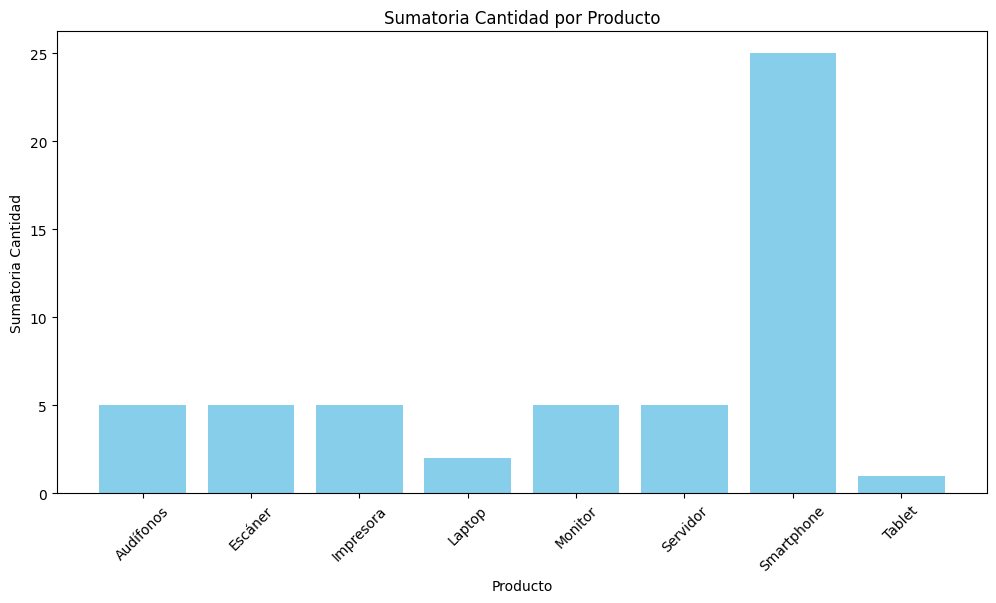

In [ ]:
plt.figure(figsize=(12, 6))  # Set the figure size for better readability
plt.bar(df_ventas['producto'], df_ventas['sumatoria_cantidad'], color='skyblue')  # Create a bar chart

# Add labels and title
plt.xlabel('Producto')
plt.ylabel('Sumatoria Cantidad')
plt.title('Sumatoria Cantidad por Producto')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

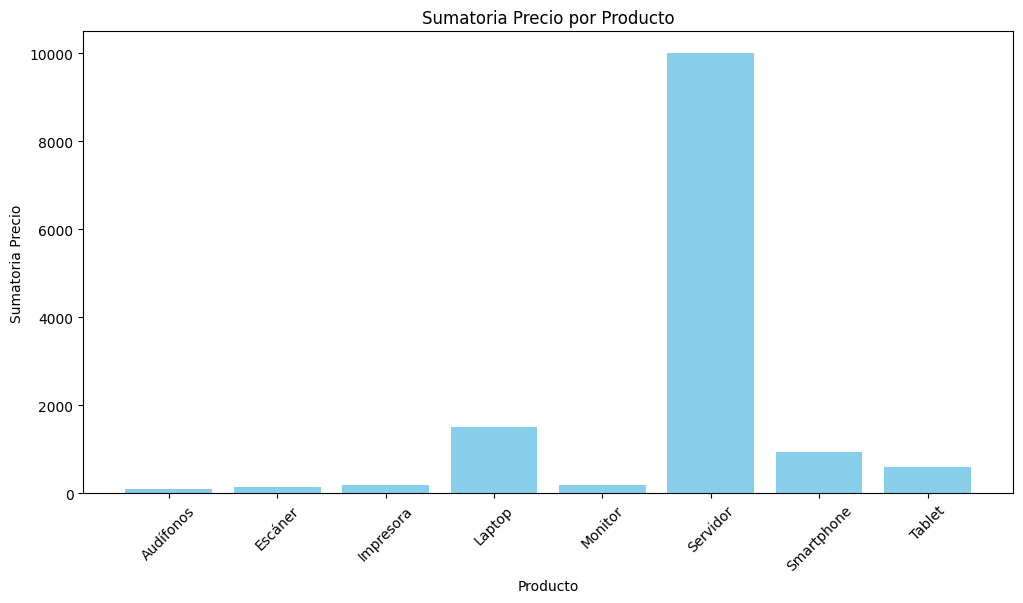

In [ ]:
plt.figure(figsize=(12, 6))  # Set the figure size for better readability
plt.bar(df_ventas['producto'], df_ventas['sumatoria_precio'], color='skyblue')  # Create a bar chart

# Add labels and title
plt.xlabel('Producto')
plt.ylabel('Sumatoria Precio')
plt.title('Sumatoria Precio por Producto')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
# Cerrar la conexión
conn.close()

In [30]:
# AGREGADO

!pip install tinydb

In [49]:
# Crear reseñas de manera aleatoria

import random
from datetime import datetime, timedelta

# Existing data
resenas = [
    {"producto": "Laptop", "reseña": "Muy buen producto", "calificación": 5, "fecha": "2024-10-01"},
    {"producto": "Smartphone", "reseña": "No muy bueno", "calificación": 2, "fecha": "2024-10-02"},
    {"producto": "Tablet", "reseña": "Excelente calidad", "calificación": 4, "fecha": "2024-10-02"},
    {"producto": "Audífonos", "reseña": "Pésima calidad", "calificación": 1, "fecha": "2024-10-03"},
]

# Lists of random product names and reviews
product_names = ["Smartwatch", "Teclado", "Monitor", "Cámara", "Impresora", "Mouse", "Altavoz", "Disco Duro", "Memoria USB", "Router"]
reviews = [
    "Buen producto",
    "Mala calidad",
    "Recomendado",
    "No cumple expectativas",
    "Excelente",
    "Regular",
    "Muy malo",
    "Fantástico",
    "Mediocre",
    "Lo mejor que he comprado"
]

# Function to generate random date
def random_date(start, end):
    return start + timedelta(days=random.randint(0, int((end - start).days)))

# Define the date range
start_date = datetime.strptime("2024-10-01", "%Y-%m-%d")
end_date = datetime.strptime("2024-10-15", "%Y-%m-%d")

# Generate random reviews to have 15 elements in total
while len(resenas) < 100:
    resenas.append({
        "producto": random.choice(product_names),
        "reseña": random.choice(reviews),
        "calificación": random.randint(1, 5),
        "fecha": random_date(start_date, end_date).strftime("%Y-%m-%d")
    })

# Mostrar las primeras 10 reseñas
for i in range(10):
    print(resenas[i])

{'producto': 'Laptop', 'reseña': 'Muy buen producto', 'calificación': 5, 'fecha': '2024-10-01'}
{'producto': 'Smartphone', 'reseña': 'No muy bueno', 'calificación': 2, 'fecha': '2024-10-02'}
{'producto': 'Tablet', 'reseña': 'Excelente calidad', 'calificación': 4, 'fecha': '2024-10-02'}
{'producto': 'Audífonos', 'reseña': 'Pésima calidad', 'calificación': 1, 'fecha': '2024-10-03'}
{'producto': 'Cámara', 'reseña': 'Mala calidad', 'calificación': 3, 'fecha': '2024-10-02'}
{'producto': 'Memoria USB', 'reseña': 'Muy malo', 'calificación': 3, 'fecha': '2024-10-13'}
{'producto': 'Monitor', 'reseña': 'Buen producto', 'calificación': 5, 'fecha': '2024-10-01'}
{'producto': 'Impresora', 'reseña': 'Excelente', 'calificación': 5, 'fecha': '2024-10-14'}
{'producto': 'Monitor', 'reseña': 'Lo mejor que he comprado', 'calificación': 3, 'fecha': '2024-10-03'}
{'producto': 'Impresora', 'reseña': 'Fantástico', 'calificación': 4, 'fecha': '2024-10-02'}


In [51]:
from tinydb import TinyDB, Query

db = TinyDB('productos.json')

# Insert data
db.insert_multiple(resenas)

results = db.all()

# Mostrar las primeras 10 reseñas
for i in range(10):
    print(resenas[i])

{'producto': 'Laptop', 'reseña': 'Muy buen producto', 'calificación': 5, 'fecha': '2024-10-01'}
{'producto': 'Smartphone', 'reseña': 'No muy bueno', 'calificación': 2, 'fecha': '2024-10-02'}
{'producto': 'Tablet', 'reseña': 'Excelente calidad', 'calificación': 4, 'fecha': '2024-10-02'}
{'producto': 'Audífonos', 'reseña': 'Pésima calidad', 'calificación': 1, 'fecha': '2024-10-03'}
{'producto': 'Cámara', 'reseña': 'Mala calidad', 'calificación': 3, 'fecha': '2024-10-02'}
{'producto': 'Memoria USB', 'reseña': 'Muy malo', 'calificación': 3, 'fecha': '2024-10-13'}
{'producto': 'Monitor', 'reseña': 'Buen producto', 'calificación': 5, 'fecha': '2024-10-01'}
{'producto': 'Impresora', 'reseña': 'Excelente', 'calificación': 5, 'fecha': '2024-10-14'}
{'producto': 'Monitor', 'reseña': 'Lo mejor que he comprado', 'calificación': 3, 'fecha': '2024-10-03'}
{'producto': 'Impresora', 'reseña': 'Fantástico', 'calificación': 4, 'fecha': '2024-10-02'}


In [52]:
df_resenas = results

# Crear una gráfica de barras con calificaciones segmentadas por producto
fig_barras = px.bar(df_resenas, x='producto', y='calificación', color='calificación',
                    title="Distribución de Calificaciones por Producto",
                    labels={'calificación': 'Calificación', 'producto': 'Producto'},
                    text_auto=True)

# Mostrar la gráfica de barras
fig_barras.show()


### Gráfica 2: Gráfica de Pastel (Porcentaje de Calificaciones) ###

# Crear una gráfica de pastel segmentada por nombre de producto
fig_pie = px.pie(df_resenas, names='producto', values='calificación',
                 title="Porcentaje de Calificaciones por Producto",
                 labels={'producto': 'Producto', 'calificación': 'Calificación'})

# Mostrar la gráfica de pastel
fig_pie.show()

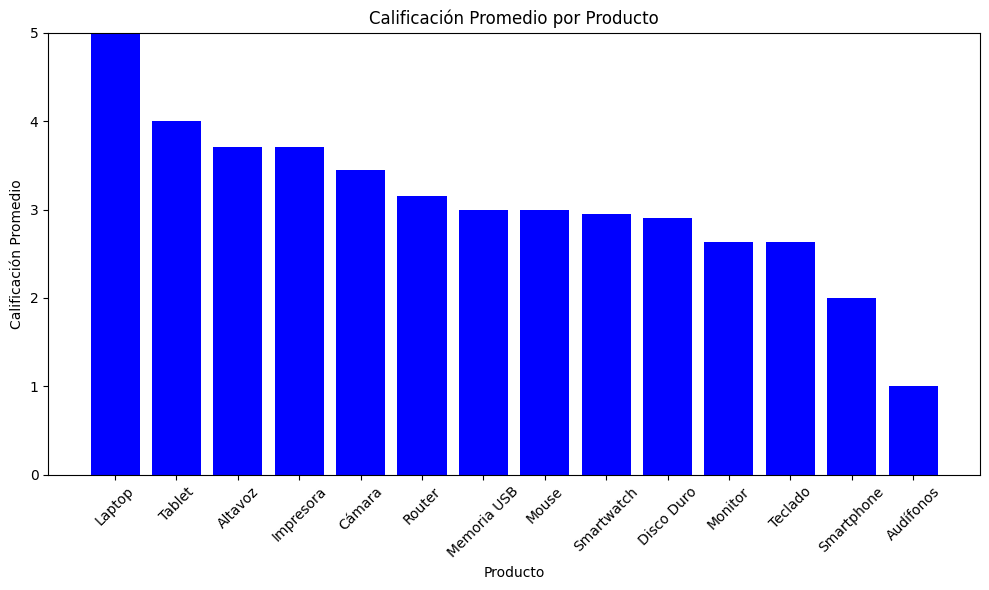

In [53]:
# graficar el promedio de reseña por producto

import matplotlib.pyplot as plt
import pandas as pd

all_reviews = db.all()

# Create a DataFrame from the reviews
df = pd.DataFrame(all_reviews)

# Calculate the average rating for each product
avg_ratings = df.groupby('producto')['calificación'].mean().reset_index()

# Sort the DataFrame by the average rating
avg_ratings = avg_ratings.sort_values(by='calificación', ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(avg_ratings['producto'], avg_ratings['calificación'], color='blue')

# Adding labels and title
plt.xlabel('Producto')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Producto')
plt.xticks(rotation=45)
plt.ylim(0, 5)

# Show the plot
plt.tight_layout()
plt.show()